In [ ]:
# 導入函式庫
import numpy as np  
import keras
# from keras.models import Sequential
from keras.datasets import mnist
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.utils import np_utils  # 用來後續將 label 標籤轉為 one-hot-encoding  
from matplotlib import pyplot as plt
import os
from datetime import datetime

start=datetime.now()

# 載入 MNIST 資料庫的訓練資料，並自動分為『訓練組』及『測試組』
(X_train, y_train), (X_test, y_test) = mnist.load_data()


# 建立簡單的線性執行的模型
model = keras.models.Sequential()
# Add Input layer, 隱藏層(hidden layer) 有 256個輸出變數
model.add(Dense(units=400, input_dim=784, kernel_initializer='normal', activation='relu')) 
model.add(Dense(units=200, activation='relu')) 
# Add output layer
model.add(Dense(units=10, kernel_initializer='normal', activation='softmax'))

# 編譯: 選擇損失函數、優化方法及成效衡量方式
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 

# 將 training 的 label 進行 one-hot encoding，例如數字 7 經過 One-hot encoding 轉換後是 0000001000，即第7個值為 1

y_TestOneHot = np_utils.to_categorical(y_test) 

# 將 training 的 label 進行 one-hot encoding，例如數字 7 經過 One-hot encoding 轉換後是 0000001000，即第7個值為 1
y_TrainOneHot = np_utils.to_categorical(y_train) 
y_TestOneHot = np_utils.to_categorical(y_test) 


# 將 training 的 input 資料轉為2維
X_train_2D = X_train.reshape(60000, 28*28).astype('float32')  
X_test_2D = X_test.reshape(10000, 28*28).astype('float32')  

x_Train_norm = X_train_2D/255
x_Test_norm = X_test_2D/255

print(model.summary())

Using TensorFlow backend.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 400)               314000    
_________________________________________________________________
dense_2 (Dense)              (None, 200)               80200     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                2010      
Total params: 396,210
Trainable params: 396,210
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
x_Train_norm.min(), x_Train_norm.max()

(0.0, 1.0)

In [ ]:
# 進行訓練, 訓練過程會存在 train_history 變數中
# calllback
train_history = model.fit(x=x_Train_norm, 
                          y=y_TrainOneHot, 
                          validation_split=0.2, 
                          epochs=50, 
                          batch_size=200, 
                          verbose=2)  


Train on 48000 samples, validate on 12000 samples
Epoch 1/50
 - 1s - loss: 0.3505 - accuracy: 0.9010 - val_loss: 0.1520 - val_accuracy: 0.9575
Epoch 2/50
 - 1s - loss: 0.1284 - accuracy: 0.9617 - val_loss: 0.1074 - val_accuracy: 0.9684
Epoch 3/50
 - 1s - loss: 0.0812 - accuracy: 0.9758 - val_loss: 0.0984 - val_accuracy: 0.9714
Epoch 4/50
 - 1s - loss: 0.0578 - accuracy: 0.9825 - val_loss: 0.0798 - val_accuracy: 0.9754
Epoch 5/50
 - 1s - loss: 0.0404 - accuracy: 0.9878 - val_loss: 0.0802 - val_accuracy: 0.9778
Epoch 6/50
 - 1s - loss: 0.0278 - accuracy: 0.9917 - val_loss: 0.0911 - val_accuracy: 0.9755
Epoch 7/50
 - 1s - loss: 0.0214 - accuracy: 0.9935 - val_loss: 0.0859 - val_accuracy: 0.9764
Epoch 8/50
 - 1s - loss: 0.0156 - accuracy: 0.9955 - val_loss: 0.0863 - val_accuracy: 0.9790
Epoch 9/50
 - 1s - loss: 0.0121 - accuracy: 0.9965 - val_loss: 0.0934 - val_accuracy: 0.9768
Epoch 10/50
 - 1s - loss: 0.0098 - accuracy: 0.9973 - val_loss: 0.0945 - val_accuracy: 0.9775
Epoch 11/50
 - 1s -

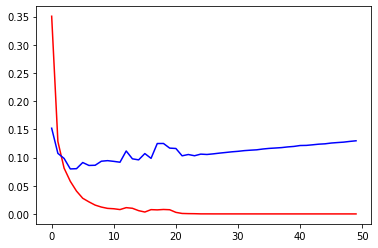

In [ ]:
%matplotlib inline
plt.plot(train_history.history['loss'], color='red')
plt.plot(train_history.history['val_loss'], color='blue')
plt.show()

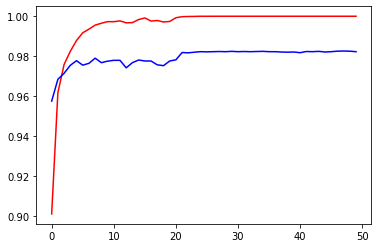

In [ ]:
%matplotlib inline
plt.plot(train_history.history['accuracy'], color='red')
plt.plot(train_history.history['val_accuracy'], color='blue')
plt.show()

In [ ]:
# 顯示訓練成果(分數) 98.7%
scores = model.evaluate(x_Train_norm, y_TrainOneHot)  
print()  
print("\t[Info] Accuracy of training data = {:2.1f}%".format(scores[1]*100.0))  


60000/60000 [==============================] - 2s 36us/step

	[Info] Accuracy of training data = 99.6%


In [ ]:
x_Test_norm.shape


(10000, 784)

In [ ]:
# 顯示訓練成果(分數) 96.2%
scores = model.evaluate(x_Test_norm, y_TestOneHot)  
print()  
print("\t[Info] Accuracy of testing data = {:2.1f}%".format(scores[1]*100.0))  


10000/10000 [==============================] - 0s 34us/step

	[Info] Accuracy of testing data = 98.3%


In [ ]:
# how to read sample image and detect 
!dir *.jpg

 Volume in drive C is OSDisk
 Volume Serial Number is 4621-6696

 Directory of c:\python\20210906-python-3rd\day06-20210927-chap04

09/29/2021  09:09 PM             1,005 6.jpg
               1 File(s)          1,005 bytes
               0 Dir(s)  140,807,532,544 bytes free


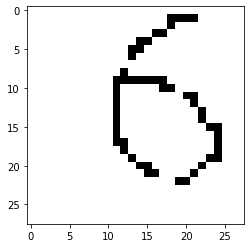

In [ ]:
import matplotlib.pyplot as plt
from skimage import color
test = color.rgb2gray(plt.imread('手寫.png')) # 手寫.png 6.jpg
plt.imshow(test, cmap='gray')
plt.show()


In [ ]:
test.shape

(28, 28)

In [ ]:
# ValueError: Error when checking input: expected dense_1_input to have shape (784,) but got array with shape (1,)

In [ ]:
import numpy as np
model.predict_proba(test.reshape(1, 784)), \
np.argmax(model.predict_proba(test.reshape(1, 784)))

(array([[1.4958440e-17, 2.6734859e-16, 1.2202197e-03, 3.8414828e-07,
         0.0000000e+00, 9.9876547e-01, 1.5618063e-08, 9.2650200e-16,
         1.3939612e-05, 3.1238306e-18]], dtype=float32), 5)